In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
sns.set(font_scale=2)

In [2]:
def parse_d(row, d_names):
    rng = range(row['groups'])
    for i, j in product(rng, rng):
        row[f'd_{i+1}{j+1}'] = row['d'][i,j]
        
    return row[d_names]

def parse_var(row, var_names, var):
    for i in range(row['groups']):
        row[f'{var}_{i+1}'] = row[var].flatten()[i]
    return row[var_names]

def parse_test(path=None):
    
    if path:
        base = pd.read_pickle(specific_file)
    else:
        l = [file_name for file_name in os.listdir() if os.path.splitext(file_name)[1] == '.pickle']

        base = pd.concat([pd.read_pickle(path) for path in l], axis=0)
        base = base[base['l'].apply(lambda x: (x!=0).all())].reset_index(drop=True)
        
        
    for col in ['sol', 'sol_gov']:
        base = pd.concat([base.drop(col, axis=1), pd.json_normalize(base[col]).add_suffix('_' + col)], axis=1)

    for col in ['cost_sol', 'cost_sol_gov']:
        base[col] = base[col].apply(lambda x: x.flatten())
        base[col] = pd.DataFrame(base[col].to_list()).sum(axis=1)


    base['sol_gap'] = base['cost_sol'] - base['cost_sol_gov']

    best_sol_indx = np.argmin(base[['cost_sol', 'cost_sol_gov']].to_numpy(), axis=1)
    base['best_sol'] = np.take(['cost_sol', 'cost_sol_gov'], best_sol_indx)
    
    base['groups'] = base['d'].apply(lambda x: x.shape[0])
    max_groups = base['groups'].max()
    rng = range(1, max_groups+1)
    
    d_names = [f'd_{i}{j}' for i, j in product(rng, rng)]
    base[d_names] = 0
    base[d_names] = base.apply(lambda row: parse_d(row, d_names), axis=1)

    l_names = [f'l_{i}' for i in rng]
    base[l_names] = 0
    base[l_names] = base.apply(lambda row: parse_var(row, l_names, 'l'), axis=1)

    v_names = [f'v_sol_{i}' for i in rng]
    base[v_names] = 0
    base[v_names] = base.apply(lambda row: parse_var(row, v_names, 'v_sol'), axis=1)
    
    return base
        


# 5 groups

In [191]:
specific_file = '/Users/danielablin/Documents/GitHub/Thesis/test_run_2023-01-18_129_100_2.pickle'
base = parse_test(specific_file)

In [192]:
base.groupby(['best_sol', 'msg_sol'])['best_sol'].count()

best_sol      msg_sol          
cost_sol      found solution        5
              no close solution    36
cost_sol_gov  found solution       59
Name: best_sol, dtype: int64

In [193]:
base.query('best_sol == "cost_sol"')[['S_sol', 'v_sol', 'S_sol_gov', 'v_sol_gov', 'l']]

,S_sol,v_sol,S_sol_gov,v_sol_gov,l
2,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.0,"[18.715683206130393, 74.86273282452157]"
4,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.0,"[15.660335865411884, 62.64134346164754]"
5,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.0,"[6.015498775934813, 24.061995103739253]"
8,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.0,"[2.5137320763828033, 10.054928305531213]"
11,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.0,"[6.378700847293057, 25.51480338917223]"
12,"[[0.9904050438039894], [0.9917310894279076]]","[[0.3957790821372925], [0.35694024756875276]]","[[0.0011479018976690218], [0.001147901897669022]]",1.0,"[20.227913356715657, 80.91165342686263]"
15,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.0,"[16.262729874961142, 65.05091949984457]"
17,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.0,"[0.5661120751339154, 2.2644483005356615]"
21,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.0,"[11.993809772345456, 47.97523908938182]"
24,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.0,"[5.045349887068084, 20.181399548272335]"


In [188]:
base[['S_sol', 'v_sol', 'S_sol_gov', 'v_sol_gov', 'l']]

,S_sol,v_sol,S_sol_gov,v_sol_gov,l
0,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.000000,"[5.721697729033459, 22.886790916133837]"
1,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.000000,"[1.4426652804895672, 5.770661121958269]"
2,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.000000,"[17.331803829585034, 69.32721531834014]"
3,"[[0.9930788865967575], [0.9941186006747325]]","[[0.38739565540654985], [0.34325605164839024]]","[[0.9957120102416696], [0.9957120102416696]]",0.357959,"[39.90942453585718, 159.6376981434287]"
4,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.000000,"[14.336597966460435, 57.34639186584174]"
5,"[[0.9928506159097356], [0.9939154803774388]]","[[0.3883605028853487], [0.34482328150089936]]","[[0.9955877101495162], [0.9955877101495162]]",0.359501,"[37.230148541724205, 148.92059416689682]"
6,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.000000,"[8.91637799580313, 35.66551198321252]"
7,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.000000,"[11.65674231987448, 46.62696927949792]"
8,"[[0.0011479018976690218], [0.001147901897669022]]","[[1.0], [1.0]]","[[0.0011479018976690218], [0.001147901897669022]]",1.000000,"[9.058703362240378, 36.23481344896151]"
9,"[[0.9932298975128956], [0.9942528530256599]]","[[0.386720112726131], [0.34216152553450563]]","[[0.9957944166169954], [0.9957944166169954]]",0.356884,"[41.85019092960834, 167.40076371843335]"


In [55]:
base[['S_sol', 'v_sol', 'S_sol_gov', 'v_sol_gov']]

,S_sol,v_sol,S_sol_gov,v_sol_gov
0,"[[0.01712576200540543], [0.13035572348140767],...","[[0.48999511495012166], [0.3606346496906349], ...","[[0.11150704554660848], [0.16915718336999808],...",0.362403
1,"[[0.02134024156271812], [0.16275903820951151],...","[[0.48032347829126043], [0.3403857534049821], ...","[[0.12756144232989997], [0.19009897942932605],...",0.355484
2,"[[0.030924983527428725], [0.1907854502040921],...","[[0.46254459692717853], [0.3338990806339933], ...","[[0.16480468164664566], [0.23717111482123132],...",0.342207
3,"[[0.018620688935315374], [0.17810529807514125]...","[[0.4937158205243688], [0.3339209816830694], [...","[[0.1555089139586423], [0.2256038730081233], [...",0.345226
4,"[[0.021292640569373102], [0.18596396441355748]...","[[0.4858962707302079], [0.330432391314205], [0...","[[0.1580428298381027], [0.22876835098451728], ...",0.344386
5,"[[0.024779005075618664], [0.1817596917663603],...","[[0.4736354673208411], [0.33151229825044365], ...","[[0.14656639082600048], [0.21436579531665728],...",0.348301
6,"[[0.02830406036405897], [0.1917074948507722], ...","[[0.46698616450712205], [0.329010314780567], [...","[[0.15713032321635456], [0.22762976311871608],...",0.344687
7,"[[0.031278337600199164], [0.19851120823517474]...","[[0.4622364755714897], [0.3289134979080247], [...","[[0.16795408518345054], [0.24106444164021823],...",0.341221
8,"[[0.026971473746563616], [0.18446811899283264]...","[[0.46867221615419563], [0.33163274087062355],...","[[0.1343002633095731], [0.19876555497150228], ...",0.352826
9,"[[0.027176057758344415], [0.1887685740926118],...","[[0.4690388935328277], [0.3296300976852509], [...","[[0.15301578632609442], [0.2224818490127182], ...",0.346066


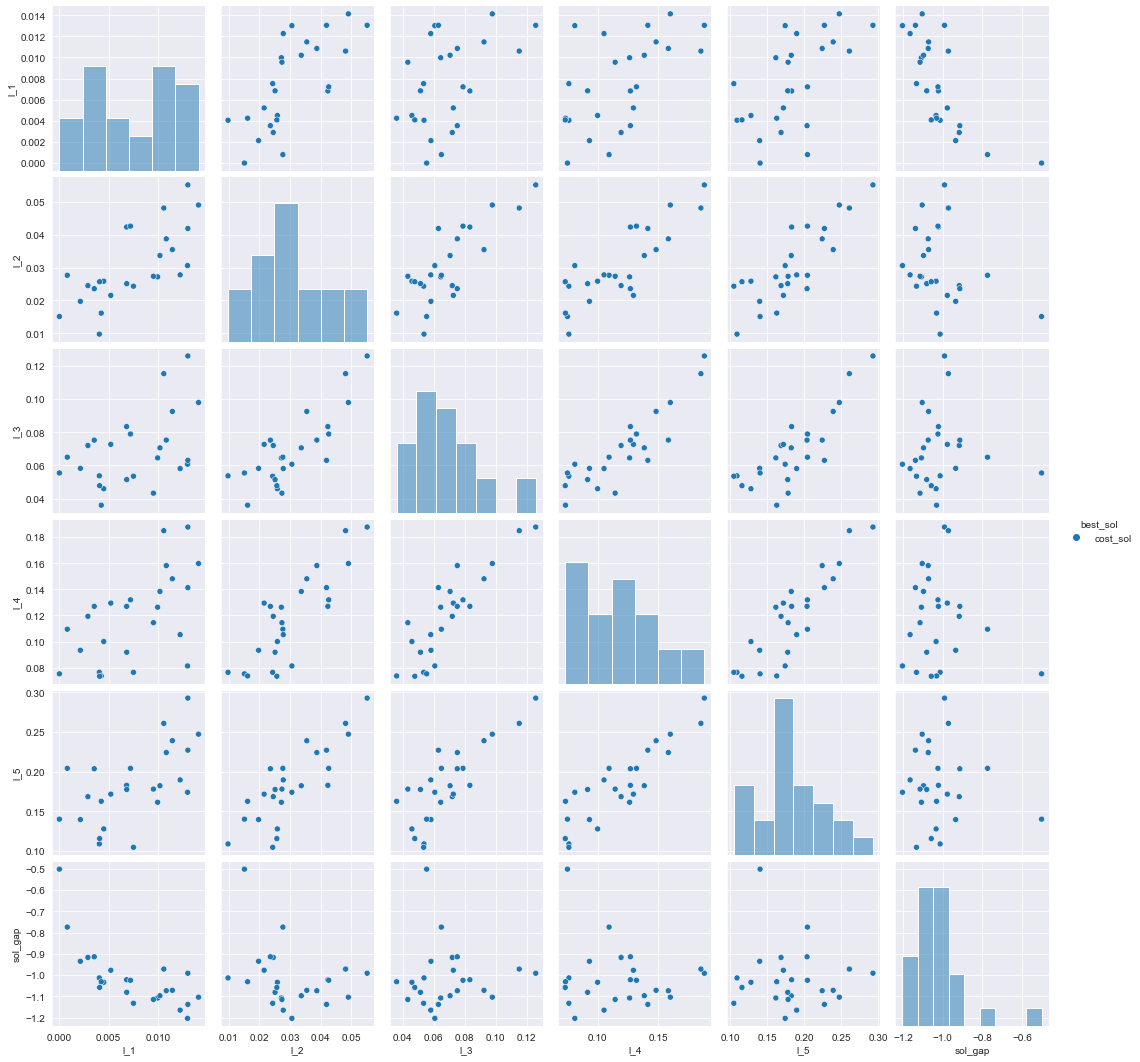

In [109]:
columns = ['l_1', 'l_2', 'l_3', 'l_4', 'l_5', 'sol_gap', 'best_sol']
sns.pairplot(base[columns], hue='best_sol', diag_kind='hist')

In [65]:
base.query('best_sol == "cost_sol_gov" and l_5 < 1000')

,T,I0,d,l,Recovered_rate,ReSusceptible_rate,contagiousness,time,v_sol,v_der_sol,cost_sol,msg_sol,v_sol_gov,v_der_sol_gov,cost_sol_gov,msg_sol_gov,v_sol_sec,v_der_sol_sec,cost_sol_sec,msg_sol_sec,sol_gap,best_sol,groups,d_11,d_12,d_13,d_14,d_15,d_21,d_22,d_23,d_24,d_25,d_31,d_32,d_33,d_34,d_35,d_41,d_42,d_43,d_44,d_45,d_51,d_52,d_53,d_54,d_55,l_1,l_2,l_3,l_4,l_5,v_sol_1,v_sol_2,v_sol_3,v_sol_4,v_sol_5


# 2 groups

In [19]:
specific_file = '/Users/danielablin/Documents/GitHub/Thesis/test_run_2023-01-10_129_50_5.pickle'
base = parse_test(specific_file)

In [20]:
base.groupby('best_sol')['best_sol'].count()

best_sol
cost_sol    50
Name: best_sol, dtype: int64

In [5]:
base.groupby('best_sol')['sol_gap'].mean()

best_sol
cost_sol   -119.114339
Name: sol_gap, dtype: float64

In [88]:
base.v_sol.apply(lambda x: np.diff(x, axis=0).sum()).mean()

-0.9444629691281422

In [6]:
base.groupby('best_sol')['sol_gap'].mean()

best_sol
cost_sol   -119.114339
Name: sol_gap, dtype: float64

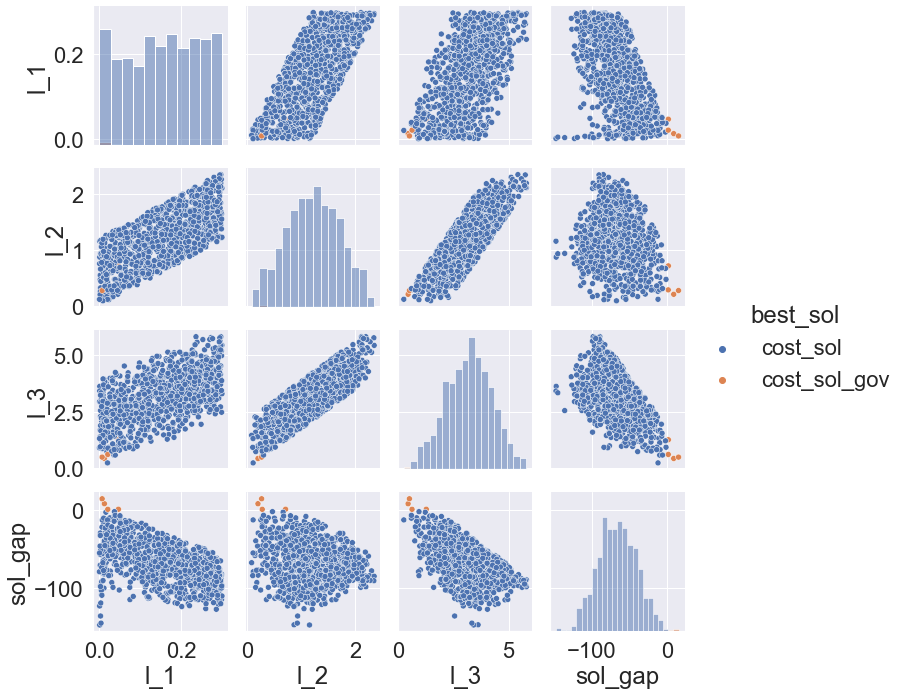

In [11]:
columns = ['l_1', 'l_2', 'sol_gap', 'best_sol']
sns.pairplot(base[columns], hue='best_sol', diag_kind='hist')

In [12]:
base.query('best_sol == "cost_sol_gov"')

,T,I0,d,l,contagiousness,time,v_sol,v_der_sol,cost_sol,msg_sol,S_sol,test_results.solution_sol,v_sol_gov,v_der_sol_gov,cost_sol_gov,msg_sol_gov,S_sol_gov,test_results.solution_sol_gov,v_sol_sec,v_der_sol_sec,cost_sol_sec,msg_sol_sec,S_sol_sec,test_results.solution_sol_sec,sol_gap,best_sol,groups,d_11,d_12,d_21,d_22,l_1,l_2,v_sol_1,v_sol_2
0,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.32840055679877184, 3.911093660915467]",1,28.318382,"[[0.3996481530103393], [0.3347521398336922]]","[[-1.2214584899084002e-10], [4.277733722801713...",4.820442,found solution,"[[0.09389416498881377], [0.6279685216452162]]",True,0.269054,"[[-5.942400875543371], [5.94240087554331]]",4.116703,found solution,"[[0.8881811888836778], [0.9732127661167066]]",True,"[[0.3983281372608579], [0.3983281372608579]]","[[4.440892098500626e-15], [0.0]]",4.983315,found solution,"[[0.08689248422286655], [0.5464722882782105]]",True,0.703739,cost_sol_gov,2,13.960271,3.055542,2.876149,2.004033,0.328401,3.911094,0.399648,0.334752
1,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.3096254287794311, 2.5741847661786434]",1,27.077485,"[[0.4070730795859725], [0.37692694392960835]]","[[-2.6645352591003757e-15], [-2.66453525910037...",4.154979,found solution,"[[0.07813726089750316], [0.5644775403338765]]",True,0.335002,"[[-2.77636948610646], [2.776369486106457]]",3.896685,found solution,"[[0.25714659389444183], [0.7226809430074309]]",True,"[[0.4064409768949246], [0.4064409768949246]]","[[4.529709940470639e-14], [0.0]]",4.189802,found solution,"[[0.07511330493295701], [0.525833430941692]]",True,0.258295,cost_sol_gov,2,13.960271,3.055542,2.876149,2.004033,0.309625,2.574185,0.407073,0.376927
2,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.367935918827036, 2.38817314061886]",1,24.447175,"[[0.38243669465989083], [0.3923056516956781]]","[[1.7763568394002505e-15], [0.0]]",4.061173,found solution,"[[0.11318174914977963], [0.5751536431901099]]",True,0.333491,"[[-1.8971247255083297], [1.897124725508327]]",3.915315,found solution,"[[0.26366916137057184], [0.727223925504183]]",True,"[[0.39002266634237415], [0.39002266634237415]]","[[0.0], [-7.105427357601002e-15]]",4.103275,found solution,"[[0.10067967231591946], [0.5680523490928654]]",True,0.145858,cost_sol_gov,2,13.960271,3.055542,2.876149,2.004033,0.367936,2.388173,0.382437,0.392306
6,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.21454518633594716, 4.106332557062898]",1,34.204820,"[[0.46054764212545746], [0.3132491792788629]]","[[-1.2844081354046466e-10], [2.450661895636585...",4.978661,found solution,"[[0.035206259024139], [0.596272887265423]]",True,0.302661,"[[-6.392064325045846], [6.392064325045851]]",4.186823,found solution,"[[0.4376691506379121], [0.8237491288574201]]",True,"[[0.4564366023040086], [0.4564366023040086]]","[[3.5083047578154947e-14], [0.0]]",5.730331,found solution,"[[0.029207369275492574], [0.408362803172253]]",True,0.791838,cost_sol_gov,2,13.960271,3.055542,2.876149,2.004033,0.214545,4.106333,0.460548,0.313249
7,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.312211150527863, 3.0150106096124474]",1,26.773668,"[[0.4062703321454914], [0.36004678448717153]]","[[-3.552713678800501e-15], [5.329070518200751e...",4.391619,found solution,"[[0.08130357093958744], [0.5876297671068795]]",True,0.321351,"[[-3.550887565470803], [3.5508875654707897]]",4.030425,found solution,"[[0.32213737714162904], [0.7643215612956336]]",True,"[[0.40529635706568323], [0.40529635706568323]]","[[3.9968028886505635e-14], [0.0]]",4.468502,found solution,"[[0.07668176076992232], [0.528718898423585]]",True,0.361193,cost_sol_gov,2,13.960271,3.055542,2.876149,2.004033,0.312211,3.015011,0.406270,0.360047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,547,0.0001,"[[13.960271493300002, 3.0555423358999994], [2....","[0.3201745209028295, 2.0879777518096265]",1,

# 2 groups moving d

In [39]:
specific_file = '/Users/danielablin/Documents/GitHub/Thesis/test_run_d_2023-01-04_129_20.pickle'
base = parse_test(specific_file)
temp_l = pd.DataFrame(base['l'].to_list())
base['cat'] = round(temp_l[1]/temp_l[0], 3)
base['pre'] = base['d_12']/(base['d_11'] + base['d_12'])
#base['sol_gap'] = (base['sol_gap']*10).clip(-1,1)

In [36]:
base['l'] = base['l'].astype(str)
base.query('pre <= 0.5').groupby(['cat', 'best_sol', 'l'])['cat'].count()

cat     best_sol      l                      
3.826   cost_sol      [0.58740301 2.24741574]    10
        cost_sol_gov  [0.58740301 2.24741574]    10
3.943   cost_sol      [0.54077003 2.13244006]    10
        cost_sol_gov  [0.54077003 2.13244006]    10
4.391   cost_sol      [0.89672104 3.93784997]     9
        cost_sol_gov  [0.89672104 3.93784997]    11
4.821   cost_sol      [0.83282829 4.01479611]     9
        cost_sol_gov  [0.83282829 4.01479611]    11
4.822   cost_sol      [0.24220057 1.16780179]    10
        cost_sol_gov  [0.24220057 1.16780179]    10
5.152   cost_sol      [0.99375366 5.11949424]     9
        cost_sol_gov  [0.99375366 5.11949424]    11
5.174   cost_sol      [0.75637438 3.91358075]     9
        cost_sol_gov  [0.75637438 3.91358075]    11
5.231   cost_sol      [0.5057221  2.64542864]     9
        cost_sol_gov  [0.5057221  2.64542864]    11
5.681   cost_sol      [0.75080045 4.26531944]     8
        cost_sol_gov  [0.75080045 4.26531944]    12
5.882   cost_sol  

In [33]:
base.query('pre > 0.1 and pre < 0.2')

,T,I0,d,l,contagiousness,time,v_sol,v_der_sol,cost_sol,msg_sol,S_sol,test_results.solution_sol,v_sol_gov,v_der_sol_gov,cost_sol_gov,msg_sol_gov,S_sol_gov,test_results.solution_sol_gov,sol_gap,best_sol,groups,d_11,d_12,d_21,d_22,l_1,l_2,v_sol_1,v_sol_2,cat,pre
7,547,0.0001,"[[6.125692978512003, 0.6832255861433334], [2.3...",[0.24220057 1.16780179],1,63.468994,"[[0.17408874870749858], [0.21409092443541514]]","[[6.890132908665692e-11], [-3.5057752256761887...",9.477230,found solution,"[[0.662942208075677], [0.7416944044438675]]",True,0.173902,"[[-9.385539109761776], [9.385539109762078]]",9.906234,found solution,"[[0.7320909404251318], [0.8527819853030165]]",True,-1.000000,cost_sol,2,6.125693,0.683226,2.382214,1.756866,0.242201,1.167802,0.174089,0.214091,4.822,0.100343
8,547,0.0001,"[[5.785376701928003, 0.7808292413066668], [2.7...",[0.24220057 1.16780179],1,63.540497,"[[0.17750882498430245], [0.20705584701475424]]","[[4.7492676458205096e-11], [-2.290157397055736...",9.568558,found solution,"[[0.6643534012306658], [0.7332369808582108]]",True,0.175680,"[[-12.408217842017656], [12.408217842017756]]",9.793340,found solution,"[[0.7552146633266218], [0.8456475543853783]]",True,-1.000000,cost_sol,2,5.785377,0.780829,2.722530,1.659262,0.242201,1.167802,0.177509,0.207056,4.822,0.118916
9,547,0.0001,"[[5.445060425344003, 0.8784328964700001], [3.0...",[0.24220057 1.16780179],1,58.723684,"[[0.18124118763340938], [0.1999525299190344]]","[[-1.808402316783031e-10], [4.4275694222051243...",9.661968,found solution,"[[0.6660548054728161], [0.725917794658339]]",True,0.177411,"[[-14.684633760147236], [14.684633760147264]]",9.684335,found solution,"[[0.7758731384940636], [0.8402931301807667]]",True,-0.223666,cost_sol,2,5.445060,0.878433,3.062846,1.561658,0.242201,1.167802,0.181241,0.199953,4.822,0.138916
10,547,0.0001,"[[5.104744148760004, 0.9760365516333335], [3.4...",[0.24220057 1.16780179],1,56.294588,"[[0.1853393398730452], [0.19278892567671008]]","[[-3.085744992858963e-10], [3.716351670846052e...",9.759377,found solution,"[[0.6680497942779638], [0.719470170526326]]",True,0.179090,"[[-16.38291610895805], [16.382916108958003]]",9.579727,found solution,"[[0.7940753777287857], [0.8362674290336681]]",True,1.000000,cost_sol_gov,2,5.104744,0.976037,3.403163,1.464055,0.242201,1.167802,0.185339,0.192789,4.822,0.160512
11,547,0.0001,"[[4.764427872176004, 1.0736402067966668], [3.7...",[0.24220057 1.16780179],1,55.582436,"[[0.1898665232860692], [0.1855740511225309]]","[[-5.951932280368055e-10], [7.038956084670644e...",9.862609,found solution,"[[0.6703485837607492], [0.71370088498491]]",True,0.180711,"[[-17.642415557384176], [17.642415557384293]]",9.480020,found solution,"[[0.8099764996784089], [0.8332328156351827]]",True,1.000000,cost_sol_gov,2,4.764428,1.073640,3.743479,1.366451,0.242201,1.167802,0.189867,0.185574,4.822,0.183903
32,547,0.0001,"[[6.125692978512003, 0.6832255861433334], [2.3...",[0.72029587 4.41951311],1,55.076069,"[[0.16714060692564053], [0.19307379891103912]]","[[-7.624052500432299e-10], [1.2522569647899218...",14.432973,found solution,"[[0.8093233517678616], [0.8721116449610025]]",True,0.162988,"[[-17.13655573405118], [17.136555734051328]]",14.559854,found solution,"[[0.8801080299580455], [0.937063800139987]]",True,-1.000000,cost_sol,2,6.125693,0.683226,2.382214,1.756866,0.720296,4.419513,0.167141,0.193074,6.136,0.100343
33,547,0.0001,"[[5.785376701928003, 0.7808292413066668], [2.7...",[0.72029587 4.41951311],1,58.563681,"[[0.1705750987250444], [0.18631085013160087]]","[[-1.3137935184204252e-10], [3.447517826771218...",14.567767,found solution,"[[0.8105721193221269], [0.8666133200895454]]",True,0.164474,"[[-19.378213141696722], [19.37821314169681]]",14.454926,found solution,"[[0.8924240129503236], [0.9344230406181007]]",True,1.000000,cost_sol_gov,2,5.785377,0.780829,2.722530,1.659262,0.720296,4.419513,0.170575,0.186311,6.136,0.118916
34,547,0.0001,"[[5.445060425344003, 0.8784328964700001], [3.0...",[0.72029587 4.41951311],1,56.103253,"[[0

<AxesSubplot:xlabel='pre', ylabel='sol_gap'>

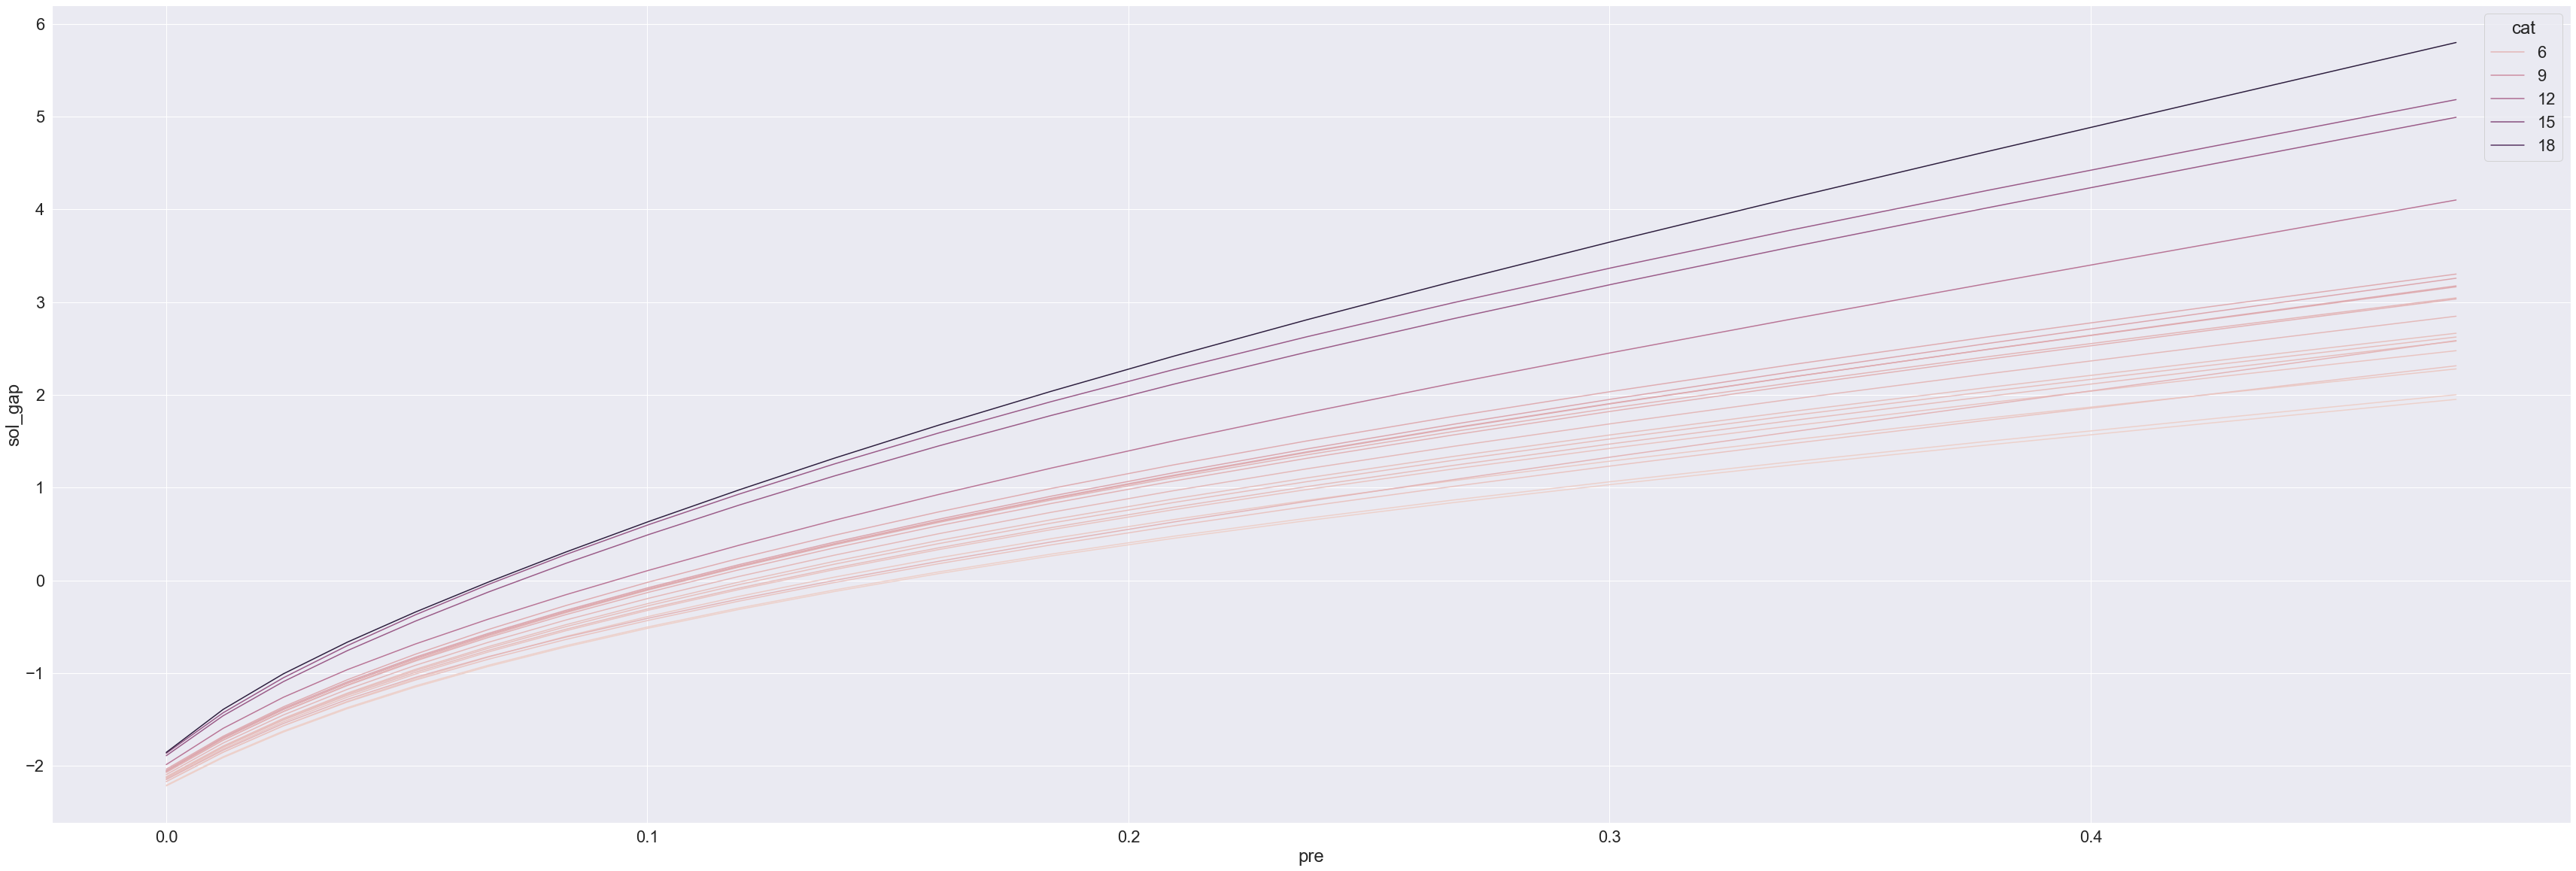

In [40]:
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(60)

sns.lineplot(data=base.query('pre <= 0.5'), x='pre', y='sol_gap', hue='cat')

In [37]:
base.query('cat==7.010')

,T,I0,d,l,contagiousness,time,v_sol,v_der_sol,cost_sol,msg_sol,S_sol,test_results.solution_sol,v_sol_gov,v_der_sol_gov,cost_sol_gov,msg_sol_gov,S_sol_gov,test_results.solution_sol_gov,sol_gap,best_sol,groups,d_11,d_12,d_21,d_22,l_1,l_2,v_sol_1,v_sol_2,cat,pre
225,547,0.0001,"[[8.507906914600001, 0.0], [0.0, 2.44009137908...",[0.43599443 3.05622072],1,46.496941,"[[0.15163285364754348], [0.24666814293319764]]","[[-8.526512829121202e-14], [5.263522950826882e...",11.189046,found solution,"[[0.746139505110526], [0.9539091206651868]]",True,0.155916,"[[39.904738307878375], [-39.904738307878304]]",13.238578,found solution,"[[0.6487906995272598], [0.998810247296095]]",True,-1.000000,cost_sol,2,8.507907,0.000000,0.000000,2.440091,0.435994,3.056221,0.151633,0.246668,7.01,0.000000
226,547,0.0001,"[[8.167590638016001, 0.09760365516333334], [0....",[0.43599443 3.05622072],1,54.296073,"[[0.15409678028421922], [0.23920211131521596]]","[[1.0444978215673473e-11], [-3.604732512485498...",11.462705,found solution,"[[0.7452591085300013], [0.9195453433870616]]",True,0.157643,"[[25.41932483522354], [-25.41932483522366]]",13.154749,found solution,"[[0.6795211856678789], [0.976004559893745]]",True,-1.000000,cost_sol,2,8.167591,0.097604,0.340316,2.342488,0.435994,3.056221,0.154097,0.239202,7.01,0.011809
227,547,0.0001,"[[7.827274361432002, 0.1952073103266667], [0.6...",[0.43599443 3.05622072],1,59.276480,"[[0.15659641184948378], [0.23160519856663486]]","[[1.6413537196058314e-12], [-3.104503321083029...",11.692739,found solution,"[[0.7450928127290279], [0.8949681940023798]]",True,0.159231,"[[12.926078955769931], [-12.926078955769977]]",13.070656,found solution,"[[0.7119598240256251], [0.9577642175163105]]",True,-1.000000,cost_sol,2,7.827274,0.195207,0.680633,2.244884,0.435994,3.056221,0.156596,0.231605,7.01,0.024333
228,547,0.0001,"[[7.486958084848002, 0.29281096549], [1.020948...",[0.43599443 3.05622072],1,61.376605,"[[0.1591819414379148], [0.22407787323600223]]","[[9.833911462919787e-12], [-1.301742713621934e...",11.890214,found solution,"[[0.7453848038708832], [0.8765855385018012]]",True,0.160728,"[[2.8689321083776846], [-2.868932108377777]]",12.983460,found solution,"[[0.7438868616829304], [0.9438401759361233]]",True,-1.000000,cost_sol,2,7.486958,0.292811,1.020949,2.147280,0.435994,3.056221,0.159182,0.224078,7.01,0.037637
229,547,0.0001,"[[7.146641808264002, 0.3904146206533334], [1.3...",[0.43599443 3.05622072],1,62.021276,"[[0.1618926524588424], [0.21666158149857365]]","[[1.525535253676935e-11], [-1.4657217661806499...",12.064823,found solution,"[[0.7460064715371284], [0.8622817618635314]]",True,0.162186,"[[-4.815363021181042], [4.815363021181213]]",12.891759,found solution,"[[0.7734853672493803], [0.9335018611282047]]",True,-1.000000,cost_sol,2,7.146642,0.390415,1.361265,2.049677,0.435994,3.056221,0.161893,0.216662,7.01,0.051799
230,547,0.0001,"[[6.806325531680002, 0.48801827581666674], [1....",[0.43599443 3.05622072],1,59.457081,"[[0.1647643918230117], [0.20933873654219828]]","[[8.72546479513403e-12], [-5.806590763768327e-...",12.224040,found solution,"[[0.7468986386607308], [0.8507945305834156]]",True,0.163645,"[[-10.49852820744115], [10.498528207441147]]",12.795538,found solution,"[[0.799770946463956], [0.9258928736899675]]",True,-1.000000,cost_sol,2,6.806326,0.488018,1.701581,1.952073,0.435994,3.056221,0.164764,0.209339,7.01,0.066904
231,547,0.0001,"[[6.466009255096003, 0.58562193098], [2.041897...",[0.43599443 3.05622072],1,56.894582,"[[0.16783301759369526], [0.20208327374119286]]","[[4.0387249100604095e-11], [-2.654104491739417...",12.373518,found solution,"[[0.7480353293299942], [0.8413328626010746]]",True,0.165122,"[[-14.629773697378198], [14.629773697378369]]",12.695729,found solution,"[[0.8224979527702532], [0.9202693793263242]]",True,-1.000000,cost_sol,2,6.466009,0.585622,2.041898,1.854469,0.435994,3.056221,0.167833,0.202083,7.01,0.083048
232,547,0.0001,"[[6.125692978512003, 0.6832255861433334], [2.3...",[0.43599443 3.05622072],1,55.594